# Principal Component Analysis

Lasst uns die PCA besprechen! Da dies nicht wirklich ein Machine Learning Algorithmus ist, sondern ein Unsupervised Learning Algorithmus werden wir zu dieser Lektion kein umfängliches Machine Learning Projekt bearbeiten. Nichtsdestotrotz schauen wir uns den Krebs-Datensatz mit einer PCA an.

## PCA Wiederholung

Stelle sicher, dass du das [Video zur Lektion und die Theorie-Erklärung](https://datatab.de/tutorial/faktorenanalyse) anschaust, um das volle Verständnis für PCA zu entwickeln. Denke daran, dass PCA einfach eine Transformation der Daten ist, um herauszufinden, welche Eigenschaften die meiste Varianz in den Daten erklären können. Zum Beispiel:

![title](Pca.png)

## Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## Die Daten

Wir werden erneut den Krebs-Datensatz verwenden, da dieser viele Eigenschaften (bzw. Spalten) beinhaltet.

In [2]:
from sklearn.datasets import load_breast_cancer


In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualisierung

Wie wir bereits festgestellt haben ist es schwer Daten mit vielen Dimensionen zu visualisieren. Wir können PCA verwenden, um die ersten beiden Principal Components zu finden und diese zu visualisieren. So erhalten wir einen zweidimensionalen Raum, mit einem einzigen Scatterplot. 

Bevor wir das tun können müssen wir unsere Daten noch so skalieren, dass jede Eigenschaft eine Varianz von 1 hat.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [10]:
scaled_data = scaler.transform(df)

PCA mit SciKit Learn erfolgt in einem Prozess, der den bereits behandelten sehr ähnlich ist. Wir instanziieren ein PCA Objekt, finden die Principal Componets mit der fit-Methode und wenden dann die Rotation und Dimensionsreduktion mit `transform()` an.

Wir können außerdem festelgen wie viele Components wir behalten wollen, wenn wir das PCA Objekt erstellen.

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2)

In [13]:
pca.fit(scaled_data)

PCA(n_components=2)

Diese Daten können wir in ihre ersten beiden Componets transformieren:

In [14]:
x_pca = pca.transform(scaled_data)

In [15]:
scaled_data.shape

(569, 30)

In [16]:
x_pca.shape

(569, 2)

Toll! Wir haben 30 Eigenschaften in zwei Componets umgewandelt. Diese beiden Dimensionen können wir jetzt visualisieren.

Text(0, 0.5, 'Zweiter Principal Component')

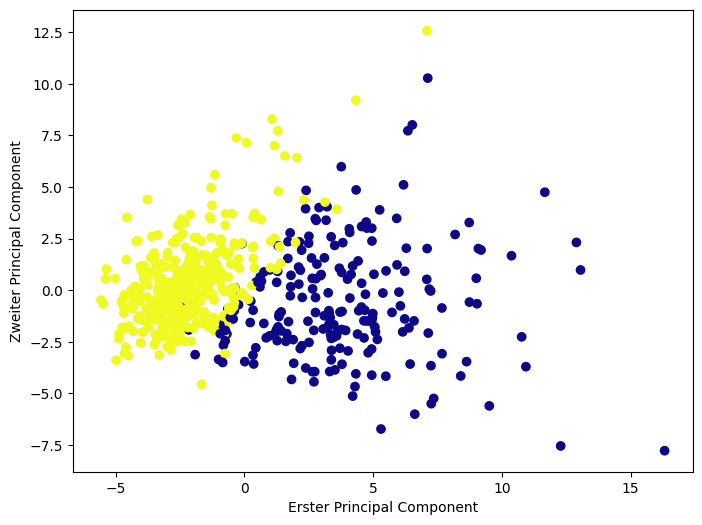

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('Erster Principal Component')
plt.ylabel('Zweiter Principal Component')

Offensichtlich können wir diese beiden Klassen leicht durch die Verwendung der Components trennen.

## Interpretation

Allerdings, durch die große Reduktion der Dimensionen, geht damit eine erhöhte Schwierigkeit der Interpretation einher. Die beiden (neuen) Dimensionen sind nun deutlich schwerer zu verstehen.

Die Components entsprechen einer Kombination der Original-Eigenschaften und werden als Attribut des PCA Objekts gespeichert:

In [18]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In diesem NumPy Array entspricht jede Zeile einem Principal Component und jede Spalte bezieht sich auf die Original-Eigenschaften. Wir können diese Beziehung in einer Heatmap visualisieren.

In [19]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<Axes: >

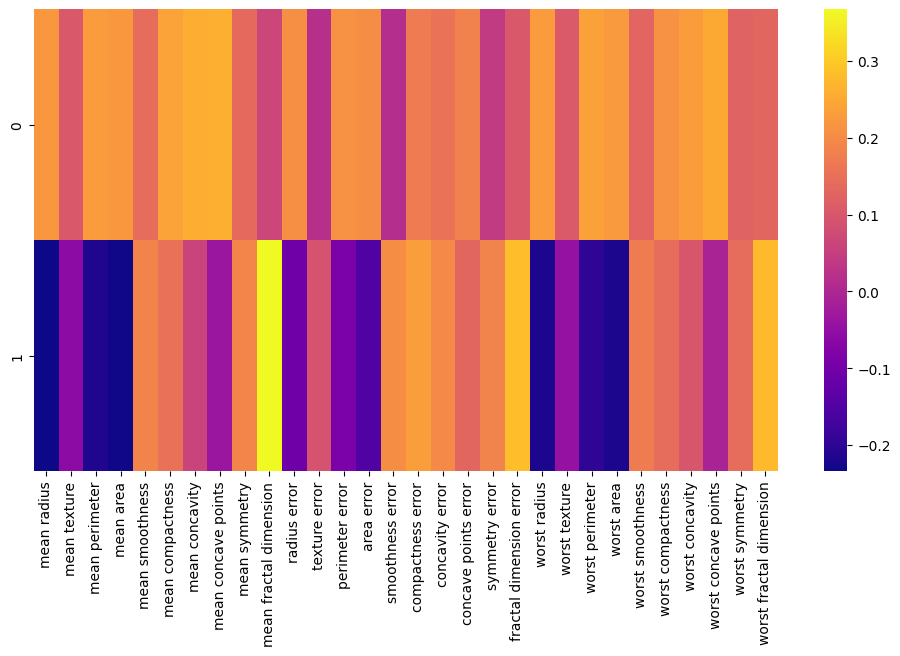

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Diese Heatmap und die Farbskala repräsentieren im Grunde genommen die Korrelation zwischen den verschiedenen Eigenschaften und den beiden Components.

## Schlussfolgerung

Hoffentlich ist diese Information nützlich für dich, wenn du mit hochdimensionalen Daten arbeitest und diese vereinfachen möchtest!

# Gut gemacht!

## Optimale Anzahl Komponenten mittels Scree-Plot

Der **Scree-Plot** ist ein grafisches Werkzeug, das in der Hauptkomponentenanalyse (PCA) verwendet wird, um zu bestimmen, wie viele Hauptkomponenten (Principal Components) in einem Datensatz sinnvollerweise berücksichtigt werden sollten.


### **Was zeigt der Scree-Plot?**
Der Scree-Plot ist ein Diagramm, in dem die **Eigenwerte** der Hauptkomponenten gegen die **Rangfolge** der Hauptkomponenten aufgetragen werden. 

- **X-Achse**: Die Hauptkomponenten in absteigender Reihenfolge der Varianz (PC1, PC2, PC3, ...).
- **Y-Achse**: Die Eigenwerte, die angeben, wie viel Varianz jede Hauptkomponente erklärt.

Das Ziel des Scree-Plots ist es, den Punkt zu finden, an dem der zusätzliche Nutzen durch weitere Hauptkomponenten abnimmt – dieser Punkt wird oft als **Knickpunkt** oder "Elbow" bezeichnet.


### **Wie interpretiert man den Scree-Plot?**

1. **Absteigende Eigenwerte:**
   - Die Eigenwerte fallen oft steil ab und beginnen dann, sich zu stabilisieren.
   - Die ersten Hauptkomponenten haben hohe Eigenwerte, da sie die meiste Varianz erklären.
   - Spätere Hauptkomponenten haben niedrigere Eigenwerte und enthalten weniger wichtige Informationen.

2. **Knickpunkt finden:**
   - Der Knickpunkt ist die Stelle, an der der Scree-Plot "abflacht".
   - Hauptkomponenten nach diesem Punkt tragen nur noch sehr wenig zur Erklärung der Varianz bei und können oft ignoriert werden.

3. **Wahl der Hauptkomponenten:**
   - Behalte nur die Hauptkomponenten **vor dem Knickpunkt**.
   - Komponenten nach dem Knickpunkt haben niedrige Eigenwerte und enthalten wenig zusätzliche Information.



In [21]:
len(scaled_data[0])

30

In [22]:
covar_matrix = PCA(n_components=len(scaled_data[0]))
covar_matrix.fit(scaled_data)

PCA(n_components=30)

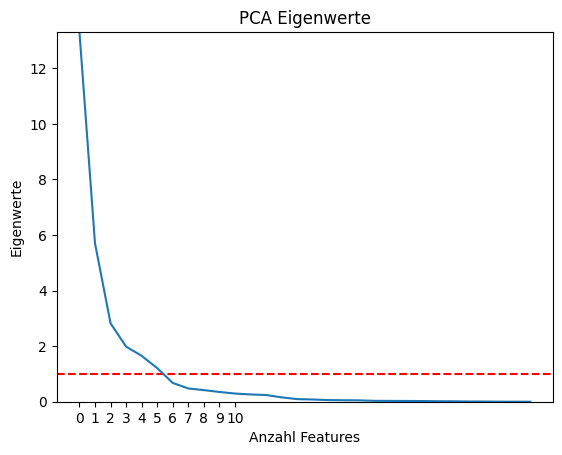

In [27]:
# Scree-Plot

plt.ylabel('Eigenwerte')
plt.xlabel('Anzahl Features')
plt.title('PCA Eigenwerte')
plt.ylim(0, max(covar_matrix.explained_variance_))
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_, )
plt.xticks(range(0,11))
plt.show()

In [36]:
covar_matrix.explained_variance_[0:10]

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734, 0.01588724, 0.01389649, 0.01168978])

In [25]:
s = 0.0
for i, p in enumerate(covar_matrix.explained_variance_ratio_):
    s += p
    print((i+1), 'Komponenten erfassen', s*100 ,'%')

1 Komponenten erfassen 44.27202560752637 %
2 Komponenten erfassen 63.243207651559466 %
3 Komponenten erfassen 72.63637090899084 %
4 Komponenten erfassen 79.23850582446099 %
5 Komponenten erfassen 84.73427431680724 %
6 Komponenten erfassen 88.7587963566906 %
7 Komponenten erfassen 91.0095300696731 %
8 Komponenten erfassen 92.59825386969443 %
9 Komponenten erfassen 93.98790324425354 %
10 Komponenten erfassen 95.1568814336667 %
11 Komponenten erfassen 96.13660042126472 %
12 Komponenten erfassen 97.00713832200259 %
13 Komponenten erfassen 97.81166330919933 %
14 Komponenten erfassen 98.33502905469196 %
15 Komponenten erfassen 98.6488122714547 %
16 Komponenten erfassen 98.91502160796993 %
17 Komponenten erfassen 99.11301840050236 %
18 Komponenten erfassen 99.288414345525 %
19 Komponenten erfassen 99.45333965144752 %
20 Komponenten erfassen 99.55720432628138 %
21 Komponenten erfassen 99.6571139726514 %
22 Komponenten erfassen 99.74857864775683 %
23 Komponenten erfassen 99.82971477364674 %
24 

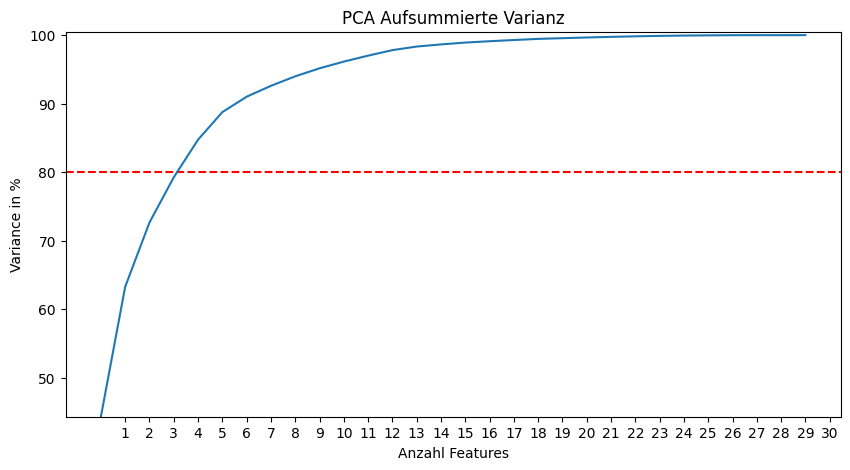

In [26]:
# grafisch dargestellt

variance = covar_matrix.explained_variance_ratio_
var = np.cumsum(variance * 100) 
#var = np.cumsum(np.round(variance, decimals=3)*100)

plt.figure(figsize=(10,5))
plt.ylabel('Variance in %')
plt.xlabel('Anzahl Features')
plt.title('PCA Aufsummierte Varianz')
plt.ylim(min(var), 100.5)
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.xticks(np.arange(1, len(var) + 1))
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

# Visualisierungseinstellungen
%matplotlib inline  
sns.set_style('darkgrid')

# Daten laden
df = pd.read_csv('College_Data.csv', index_col=0) 

# Histogramm für Abschlussrate nach Privatschule
g = sns.FacetGrid(df, hue="Private", palette='coolwarm', height=6, aspect=2)
g = g.map(plt.hist, 'Grad.Rate', bins=20, alpha=0.7)
plt.legend(title="Private University")
plt.show()

# Kategorische Spalte entfernen und Daten skalieren
X = df.drop('Private', axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)  

# PCA für 2 Hauptkomponenten
pca = PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

# Umwandlung von Private-Spalte in numerische Werte
df['Private'] = df['Private'].map({"Yes": 1, "No": 0})  

# Visualisierung der PCA-Daten
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df['Private'], cmap='tab10')
plt.xlabel('Erster Principal Component')
plt.ylabel('Zweiter Principal Component')
plt.title("PCA-Transformation")
plt.show()

# Erklärte Varianz durch PCA
explained_variance = pca.explained_variance_ratio_
print("Erklärte Varianz:", explained_variance)

# K-Means Algorithmus mit 2 Clustern
kmeans = KMeans(n_clusters=2, random_state=42)
data_pca = pd.DataFrame(x_pca, columns=['PC1', 'PC2'])
data_pca['Private'] = df['Private']
data_pca['Cluster'] = kmeans.fit_predict(data_pca[['PC1', 'PC2']])

# Cluster umkehren, falls notwendig
if data_pca.groupby('Cluster')['Private'].mean()[0] > data_pca.groupby('Cluster')['Private'].mean()[1]:
    data_pca['Cluster'] = 1 - data_pca['Cluster']  

# Streudiagramm für Clustering
plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1', y='PC2', hue=data_pca['Cluster'], palette='tab10', data=data_pca)
plt.title("K-Means Clustering mit PCA")
plt.show()

# Confusion Matrix & Klassifikationsbericht
cm = confusion_matrix(data_pca['Private'], data_pca['Cluster'])
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(data_pca['Private'], data_pca['Cluster']))


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Daten laden (angenommen, der DataFrame heißt 'df')
df = pd.read_csv('universities_data.csv')

# 1. Entfernen der 'Private' Spalte, da sie kein Merkmal für PCA ist
df_features = df.drop('Private', axis=1)

# 2. Standardisieren der Merkmale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

# 3. PCA durchführen (2 Hauptkomponenten)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# 4. Erstellen eines DataFrames mit den Hauptkomponenten
pca_df = pd.DataFrame(pca_result, columns=['Hauptk.1', 'Hauptk.2'])

# Ergebnis anzeigen
print(pca_df.head())

In [1]:
# Importieren der notwendigen Bibliotheken
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. Daten einlesen
# Lies die CSV-Datei "College_Data.csv" ein und setze die erste Spalte als Index
df = pd.read_csv('College_Data.csv', index_col=0)

# 2. Daten bereinigen
# Setze die Abschlussrate ("Grad.Rate") auf 100, falls sie höher ist (da 100 das Maximum ist)
df['Grad.Rate'] = df['Grad.Rate'].apply(lambda x: 100 if x > 100 else x)

# 3. Merkmale zusammenfassen mit PCA
# Entferne die Spalte "Private", da sie die Zielvariable ist und kein Merkmal
features = df.drop('Private', axis=1)

# Erstelle ein PCA-Objekt mit 2 Hauptkomponenten
pca = PCA(n_components=2)

# Transformiere die Merkmale mit PCA
principal_components = pca.fit_transform(features)

# Erstelle ein DataFrame mit den beiden Hauptkomponenten
principal_df = pd.DataFrame(data=principal_components, columns=['Hauptk.1', 'Hauptk.2'])

# Berechne die erklärte Varianz der beiden Hauptkomponenten
explained_variance = pca.explained_variance_ratio_
print(f"Erklärte Varianz durch Hauptkomponente 1: {explained_variance[0]:.2f}")
print(f"Erklärte Varianz durch Hauptkomponente 2: {explained_variance[1]:.2f}")
print(f"Gesamte erklärte Varianz: {sum(explained_variance):.2f}")

# 4. K-Means Clustering
# Importiere KMeans und erstelle eine Instanz mit 2 Clustern
kmeans = KMeans(n_clusters=2, random_state=42)

# Fitte das Modell auf die Hauptkomponenten
kmeans.fit(principal_df)

# Füge die Cluster-Labels dem DataFrame hinzu
principal_df['Cluster'] = kmeans.labels_

# 5. Visualisierung der Cluster
# Erstelle einen Scatterplot der beiden Hauptkomponenten, farblich nach Cluster getrennt
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['Hauptk.1'], principal_df['Hauptk.2'], c=principal_df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering mit 2 Clustern')
plt.xlabel('Hauptkomponente 1')
plt.ylabel('Hauptkomponente 2')
plt.colorbar(label='Cluster')
plt.show()

# 6. Auswertung
# Füge die Zielvariable "Private" dem DataFrame mit den Hauptkomponenten hinzu
principal_df['Private'] = df['Private'].values

# Vergleiche die Cluster mit der Zielvariable "Private"
cluster_private_comparison = principal_df.groupby(['Cluster', 'Private']).size().unstack()
print(cluster_private_comparison)

# Überprüfe, ob die Cluster korrekt zugeordnet sind
# Wenn die Mehrheit der Cluster 0 zu "No" und Cluster 1 zu "Yes" gehört, ist die Zuordnung korrekt
# Andernfalls invertiere die Cluster-Labels
if cluster_private_comparison.loc[0, 'No'] > cluster_private_comparison.loc[0, 'Yes']:
    principal_df['Cluster'] = principal_df['Cluster'].apply(lambda x: 1 if x == 0 else 0)

# Erstelle eine Confusion Matrix und den Classification Report
conf_matrix = confusion_matrix(principal_df['Private'], principal_df['Cluster'])
class_report = classification_report(principal_df['Private'], principal_df['Cluster'])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

FileNotFoundError: [Errno 2] No such file or directory: 'College_Data.csv'